# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Описание данных</b><br>
<ul>
    <li><b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)</li>
<li><b>balcony</b> — число балконов</li>
<li><b>ceiling_height</b> — высота потолков (м)</li>
<li><b>cityCenters_nearest</b> — расстояние до центра города (м)</li>
<li><b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)</li>
<li><b>first_day_exposition</b> — дата публикации</li>
<li><b>floor</b> — этаж</li>
<li><b>floors_total</b> — всего этажей в доме</li>
<li><b>is_apartment</b> — апартаменты (булев тип)</li>
<li><b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)</li>
<li><b>last_price</b> — цена на момент снятия с публикации</li></li>
<li><b>living_area</b> — жилая площадь в квадратных метрах(м²)</li>
<li><b>locality_name</b> — название населённого пункта</li>
<li><b>open_plan</b> — свободная планировка (булев тип)</li>
<li><b>parks_around3000</b> — число парков в радиусе 3 км</li>
<li><b>parks_nearest</b> — расстояние до ближайшего парка (м)</li>
<li><b>ponds_around3000</b> — число водоёмов в радиусе 3 км</li>
<li><b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)</li>
<li><b>rooms</b> — число комнат</li>
<li><b>studio</b> — квартира-студия (булев тип)</li>
<li><b>total_area</b> — площадь квартиры в квадратных метрах (м²)</li>
<li><b>total_images</b> — число фотографий квартиры в объявлении</li>
</ul>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#Подключим необходимые библиотеки для нашего анализа
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#передадим в переменную df - наши данные формата csv c параметрами sep и decimal
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
#Попробуем еще раз просмотреть информацию о нашем датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#выведем 5 первых строчек
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#Изучим файл методом describe
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#Изучим столбец "цена на момент снятия с публикации"
df.last_price.value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64

In [7]:
#Изучим столбец "площадь квартиры в квадратных метрах"
df.total_area.value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [8]:
#Изучим столбец "дата публикации"
df.first_day_exposition.value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2016-09-03T00:00:00      1
2015-06-22T00:00:00      1
2015-06-08T00:00:00      1
2015-07-17T00:00:00      1
2015-03-01T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [9]:
#столбец число комнат
df.rooms.value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [10]:
#Столбец "Высота потолков"
df.ceiling_height.value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [11]:
#Столбец "Этаж"
df.floor.value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

In [12]:
#Столбец "Всего этажей в доме"
df.floors_total.value_counts()            

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [13]:
#Столбец "Жилая площадь м2"
df.living_area.value_counts()              

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

In [14]:
#Столбец апартаменты (булев тип)
df.is_apartment.value_counts()           

False    2725
True       50
Name: is_apartment, dtype: int64

In [15]:
#Столбец "Квартира - студия(булев тип)"
df.studio.value_counts()                  

False    23550
True       149
Name: studio, dtype: int64

In [16]:
#столбец "Свободная планировка (булев тип)"
df.open_plan.value_counts()                 

False    23632
True        67
Name: open_plan, dtype: int64

In [17]:
#Столбец "Площадь кухни"
df.kitchen_area.value_counts()          

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64

In [18]:
#Столбец "число балконов"
df.balcony.value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [19]:
#Столбец "название населенного пункта"
df.locality_name.value_counts()          

Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Почап             1
деревня Новолисино        1
поселок Рабитицы          1
деревня Шпаньково         1
посёлок Шугозеро          1
Name: locality_name, Length: 364, dtype: int64

In [20]:
#Столбец "расстояние до ближайшего аэропорта в метрах"
df.airports_nearest.value_counts()       

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [21]:
#Столбец "расстояние до центра города в метрах"
df.cityCenters_nearest.value_counts()  

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [22]:
#Столбец "число парков в радиусе 3км"
df.parks_around3000.value_counts()    

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [23]:
#Столбец "Расстояние до ближайшего парка в метрах"
df.parks_nearest.value_counts()         

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
863.0      1
2880.0     1
969.0      1
1011.0     1
775.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [24]:
#Столбец "Число водоемов в радиусе 3км"
df.ponds_around3000.value_counts()      

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [25]:
#Столбец "Расстояние до ближайшего водоема в метрах"
df.ponds_nearest.value_counts()     

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
742.0      1
1019.0     1
948.0      1
1275.0     1
193.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [26]:
#Столбец "Cколько дней было размещено объявление(от публикации до снятия)"
df.days_exposition.value_counts()   

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [27]:
#Посмотрим сколько у нас имеются пустых значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [28]:
#Посмотрим имеются ли в таблице повторяющиеся строки
df.duplicated().sum()

0

### Вывод

<div class="alert alert-block alert-info">
    <ul type='circle'>
  <li>Изучив полученные данные, мы можем видеть, что наш датасет состоит из 23699 строк, имеются незаполненные строки. </li>
 <li>Имеются столбцы, где нужно будет исправить их типы данных для дальшейнего использования в нашем анализе</li>
 <li>Для удобства анализа сократим **['last_price']** до млн , чтобы удобно было проводить расчеты и исключить огромные цифры.</li>
 <li>Столбец **['first_day_exposition']** нужно будет перевести в правильный формат через to_datetime</li>
 <li>**['locality_name']** - привести к нижнему регистру и изучить на повторяющиеся по смыслу названия, чтобы исключить повторения</li>
 <li>Повторяющихся строк(дубликатов) в таблице нет</li>
 <li>Имеются пустые значения в столбцах, с которыми мы будем проводить анализ : ceiling_height, floors_total, living_area, kitchen_area и др. Поэтому нужно будет из заполнить методом fillna()</li></ul>
</div>

### Шаг 2. Предобработка данных

In [29]:
#Переведем столбец first_day_exposition в тип данных datetime 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [30]:
#Приведем к нижнему регистру столбец с названием поселков
df.locality_name = df.locality_name.str.lower()
df.locality_name.value_counts()

санкт-петербург                                            15721
посёлок мурино                                               522
посёлок шушары                                               440
всеволожск                                                   398
пушкин                                                       369
                                                           ...  
деревня вахнова кара                                           1
деревня тихковицы                                              1
садоводческое некоммерческое товарищество лесная поляна        1
поселок гладкое                                                1
посёлок платформа 69-й километр                                1
Name: locality_name, Length: 364, dtype: int64

In [31]:
#Посчитаем количество пустых значений в столбцах
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [32]:
#Заменим пустые значения в столбце is_apartment на False
df['is_apartment']=df['is_apartment'].fillna(False)

In [33]:
#Переведем сначала в numeric наши столбцы чтобы можно было их перевести в int 
for column in ['last_price','total_area','ceiling_height',
              'floors_total','living_area','kitchen_area','balcony',
              'airports_nearest','cityCenters_nearest', 'parks_around3000',
              'parks_nearest','ponds_around3000','ponds_nearest',
              'days_exposition']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [34]:
#Проверим получилось ли у нас поменять типы данных 
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [35]:
#Заменим пустые значения в столбце количество балконов на 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [36]:
#в остальных случаях заменим пустые значения на -1, чтобы потом можно было их срезать или 
#замениь на другие значения для проведения нашего анализа
for column in ['ceiling_height','floors_total','living_area',
                'kitchen_area','airports_nearest','cityCenters_nearest',
                'parks_around3000','parks_nearest','ponds_around3000',
                 'ponds_nearest','days_exposition']:
    df[column] = df[column].fillna(-1)

In [37]:
#Проверим заполнились ли пустые значения
df.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

In [38]:
#Изменим большие цифры в last_price на миллионы
df['last_price'] = df['last_price']/1000000

In [39]:
#заменим наши минусовые значения в столбце высота потолков на медиану 
#Посмотрим какая медианная высота потолков у нас получилась
df['ceiling_height']=df['ceiling_height'].replace(-1, df['ceiling_height'].median())
df.ceiling_height.tail(20)

23679    2.50
23680    2.50
23681    2.50
23682    2.50
23683    2.50
23684    3.00
23685    2.50
23686    2.55
23687    2.50
23688    3.05
23689    2.86
23690    2.50
23691    2.75
23692    2.50
23693    2.60
23694    3.70
23695    2.50
23696    2.50
23697    3.00
23698    2.50
Name: ceiling_height, dtype: float64

In [40]:
#Переведем все значения в int
for column in ['last_price','is_apartment','total_area',
         'floors_total','living_area','kitchen_area','days_exposition','balcony',
         'airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest',
         'ponds_around3000','ponds_nearest']:
    df[column] = df[column].astype(int, errors='ignore')

In [41]:
#Проверим получилось ли у нас поменять типы данных и заполнить пустые значения
df.dtypes

total_images                     int64
last_price                       int32
total_area                       int32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                      int32
floor                            int64
is_apartment                     int32
studio                            bool
open_plan                         bool
kitchen_area                     int32
balcony                          int32
locality_name                   object
airports_nearest                 int32
cityCenters_nearest              int32
parks_around3000                 int32
parks_nearest                    int32
ponds_around3000                 int32
ponds_nearest                    int32
days_exposition                  int32
dtype: object

  ### Вывод

<div class="alert alert-block alert-info"> 
<ul type='circle'>    
    <li>Перевели столбец <b>first_day_exposition</b> в тип данных <b>datetime</b></li>
    <li>Привели к нижнему регистру столбец с названием поселков - <b>locality_name</b></li>
<li>Так как наши столбцы с данными были многие типа *object* пришлось методом *to_numeric* первести в формат float заменив пустые значения на <b>NaN</b>. </li>
    <li>Пустые значения в <b>балконах</b> заменили на 0</li>
<li>Так же в столбце is_apartment - добавили значение False</li>
    <li>Посчитали количество пустых значений и заменили их на <b>-1</b> , чтобы в будущем анализе было легче провести срез.</li>
    <li>Перевели наши столбцы в формат *int* и в столбце <b>last_price</b> данные разделили на 1 млн, чтобы избежать огромных чисел в наших расчетах. в будущем цены в столбце  <b>last_price</b> указаны в млн.</li>
    </ul>
    </div>

### Шаг 3. Посчитайте и добавьте в таблицу

In [42]:
#Добавим столбец с ценой за квадратный метр
df['price_per_meter'] = (df['last_price']/df['total_area'])*1000000

In [43]:
#Напишем функцию, которая будет определять этаж на котором расположена квартира (первый, последний, другой)
def floor_table(floor,floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'


In [44]:
#методом apply передадим данные столбцов в нашу функцию floor_table
df['floor_is'] = df.apply(lambda x: floor_table(x.floor, x.floors_total), axis=1)

In [45]:
#Создадим столбцы соотношения жилой площади к общей площади и площади кухни к общей площади
df['ratio_area'] = df['living_area']/df['total_area']
df['ratio_kitchen'] = df['kitchen_area']/df['total_area']

In [46]:
#день недели, месяц и год публикации
#df['published_day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['published_day'] = df['first_day_exposition'].dt.weekday
df['published_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['published_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [49]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_is,ratio_area,ratio_kitchen,published_day,published_month,published_year
0,20,13,108,2019-03-07,3,2.70,16,51,8,0,...,2,755,-1,120370.370370,другой,0.472222,0.231481,3,3,2019
1,7,3,40,2018-12-04,1,2.50,11,18,1,0,...,0,-1,81,75000.000000,первый,0.450000,0.275000,1,12,2018
2,10,5,56,2015-08-20,2,2.50,5,34,4,0,...,2,574,558,89285.714286,другой,0.607143,0.142857,3,8,2015
3,0,64,159,2015-07-24,3,2.50,14,-1,9,0,...,3,234,424,402515.723270,другой,-0.006289,-0.006289,4,7,2015
4,2,10,100,2018-06-19,2,3.03,14,32,13,0,...,1,48,121,100000.000000,другой,0.320000,0.410000,1,6,2018


### Вывод

<div class="alert alert-block alert-info">
    <ul type='square'>
        <li>Добавили по ТЗ необходимые столбцы такие как <b>price_per_meter</b>(цена за квадратный метр) ,<b>ratio_area</b> (соотношение жилой площади к общей площади), <b>ration_kitchen</b>(соотношение кухни на общую площадь) и добавили столбцы с <b>днем, месяцем и годом публикации</b>.</li></ul>
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучим следующие параметры : площадь, цена, число комнат, высота потолков

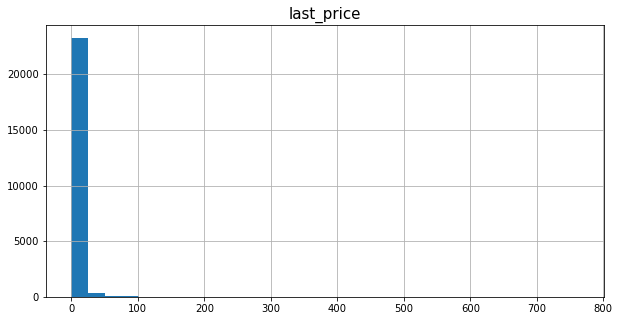

count    23699.000000
mean         6.053040
std         10.914448
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price, dtype: float64


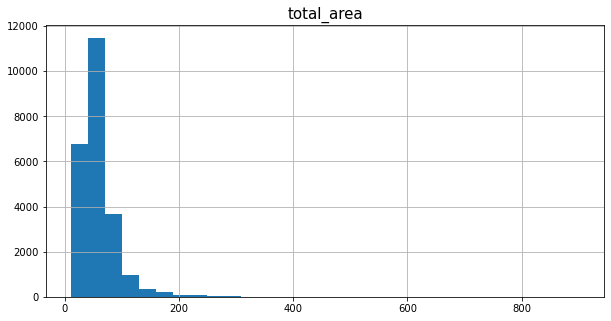

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


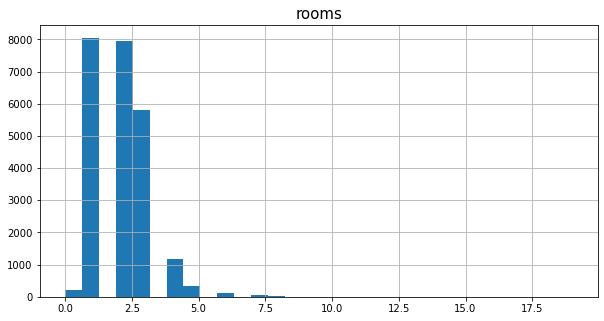

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


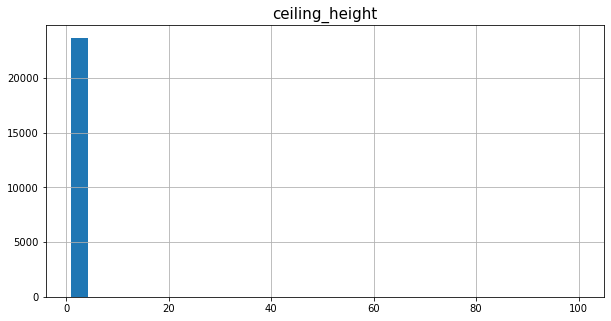

count    23699.000000
mean         2.666160
std          0.995355
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


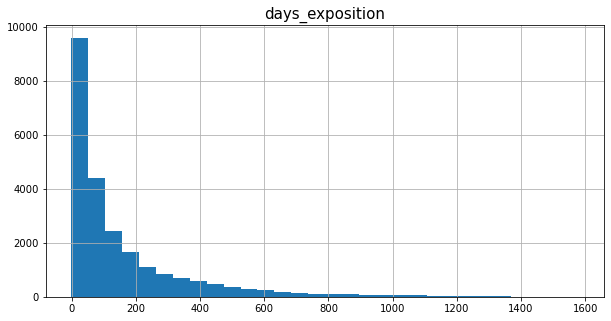

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [50]:
#Построим наши гистограммы с помощью цикла, для гистограмм возьмем столбцы цену, площадь, 
#кол-во комнат, высоту потолков и время продажи
for columns in df[['last_price','total_area','rooms','ceiling_height','days_exposition']]:
    range_max = df[columns].max()
    range_min = df[columns].min()
    df[columns].hist(bins=30, range=(range_min, range_max), figsize=(10,5))
    plt.title(columns, fontsize=15)
    plt.show()
    print(df[columns].describe())
    
        

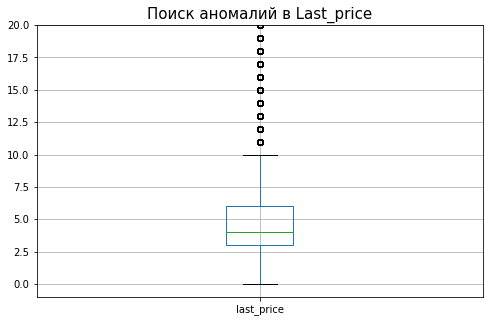

In [51]:
#Поиск аномалий с boxplot в столбце last_price
plt.figure(figsize=(8, 5))
df.boxplot(column='last_price')
plt.title('Поиск аномалий в Last_price', fontsize=15)
plt.ylim(-1, 20)
plt.show()      

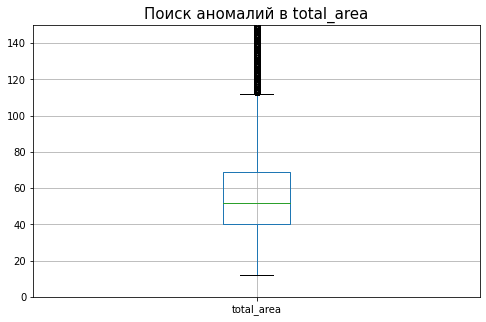

In [52]:
#Поиск аномалий с boxplot в столбце total_area
plt.figure(figsize=(8, 5))
df.boxplot(column='total_area')
plt.title('Поиск аномалий в total_area', fontsize=15)
plt.ylim(0, 150)
plt.show()      

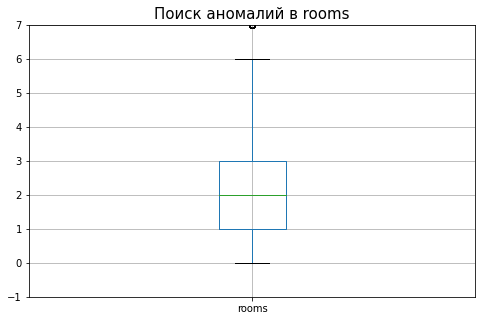

In [53]:
#Поиск аномалий с boxplot в столбце rooms
plt.figure(figsize=(8, 5))
df.boxplot(column='rooms')
plt.title('Поиск аномалий в rooms', fontsize=15)
plt.ylim(-1, 7)
plt.show()      

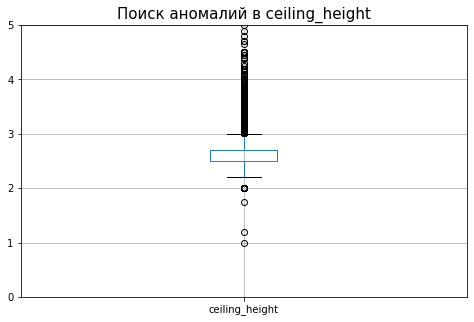

In [54]:
#Поиск аномалий с boxplot в столбце ceiling_height
plt.figure(figsize=(8, 5))
df.boxplot(column='ceiling_height')
plt.title('Поиск аномалий в ceiling_height', fontsize=15)
plt.ylim(0, 5)
plt.show()      

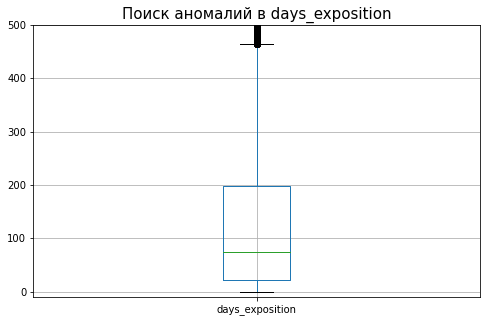

In [55]:
#Поиск аномалий с boxplot в столбце days_exposition
plt.figure(figsize=(8, 5))
df.boxplot(column='days_exposition')
plt.title('Поиск аномалий в days_exposition', fontsize=15)
plt.ylim(-10,500)
plt.show()      

In [56]:
#Проведем срезы по нашим таблицам исходя из аномалий и сразу
#посчитаем процент данных, которые мы срезали

last_price_slice = df.query('1 <= last_price <= 10')
last_price_slice_percent = (last_price_slice.count() / df['last_price'].count())

total_area_slice = df.query('10 <= total_area <= 110')
total_area_slice_percent = (total_area_slice.count() / df['total_area'].count())

rooms_slice = df.query('1 <= rooms <= 6')
rooms_slice_percent = (rooms_slice.count() / df['rooms'].count())

ceiling_height_slice = df.query('2 < ceiling_height < 3')
ceiling_height_slice_percent = (ceiling_height_slice.count() / df['ceiling_height'].count())

days_exposition_slice = df.query('22 <= days_exposition <= 450 ')
days_exposition_slice_percent = (days_exposition_slice.count() / df['days_exposition'].count())


In [57]:
#Процент среза по столбцу last_price
print('Под срез со столбца last_price ушло данных: {:.0%}'.format(last_price_slice_percent['last_price']))
print('Под срез со столбца total_area ушло данных: {:.0%}'.format(total_area_slice_percent['total_area']))
print('Под срез со столбца rooms ушло данных: {:.0%}'.format(rooms_slice_percent['rooms']))
print('Под срез со столбца ceiling_height ушло данных: {:.0%}'.format(ceiling_height_slice_percent['ceiling_height']))
print('Под срез со столбца days_exposition ушло данных: {:.0%}'.format(days_exposition_slice_percent['days_exposition']))


Под срез со столбца last_price ушло данных: 89%
Под срез со столбца total_area ушло данных: 94%
Под срез со столбца rooms ушло данных: 99%
Под срез со столбца ceiling_height ушло данных: 89%
Под срез со столбца days_exposition ушло данных: 67%


<div class="alert alert-block alert-info">
В среднем квартиры продаются по цене 6 млн рублей, с площадью 60 кв. метров, с двумя комнатами и высотой полков 2.6 метров. 
<br>Быстрая продажа квартиры занимает до 22 дней. Средняя продажа занимает от 22 дней до 200 дней. То что больше 200 дней попадает
под долгую продажу квартиры<br>
    С помощью boxplot провели поиск аномалий и провели срез данных исходя из коробки и усов графика
   <br> Посчитали процент среза, который мы провели по столбцам
</div>

### Изучим какие факторы больше всего влияют на стоимость квартиры. Изучим зависит ли цена от квадратного метра, числа комнат, удаленности от центра. Изучим зависимость цены от того, на каком этаже расположена квартира. Также изучим зависимость от даты размещения

Text(0.5, 1.0, 'Как размер площади влияет на цену квартиры')

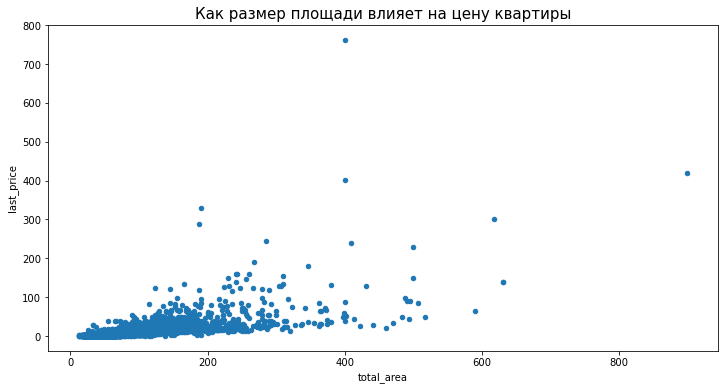

In [58]:
#Посмотрим как влияет размер площади на цену квартиры
df.plot(y='last_price',x='total_area',kind='scatter', figsize=(12,6))
plt.title('Как размер площади влияет на цену квартиры', fontsize=15)

In [59]:
#Посмотрим корреляцию между площадью и ценой
df['total_area'].corr(df['price_per_meter'])

0.3477886938514016

<div class="alert alert-block alert-info">
    Корелляция заметная. То есть, чем больше площадь, тем дороже цена
</div>

Text(0.5, 1.0, 'Как количество комнат влияет на цену квартиры')

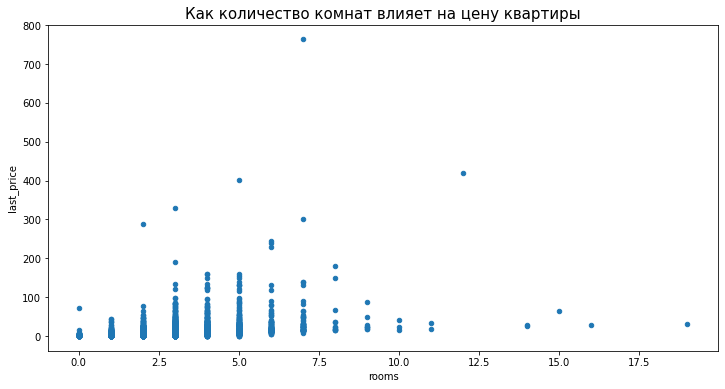

In [60]:
#Как количество комнат влияет на цену квартиры
df.plot(y='last_price',x='rooms',kind='scatter', figsize=(12,6))
plt.title('Как количество комнат влияет на цену квартиры', fontsize=15)

In [61]:
#Посмотрим корелляцию между двумя столбцами
df['rooms'].corr(df['price_per_meter'])

0.10883166023100704

Корелляция между количеством комнат и ценой умеренная

Text(0.5, 1.0, 'Как расстояние до центра влияет на цену квартиры')

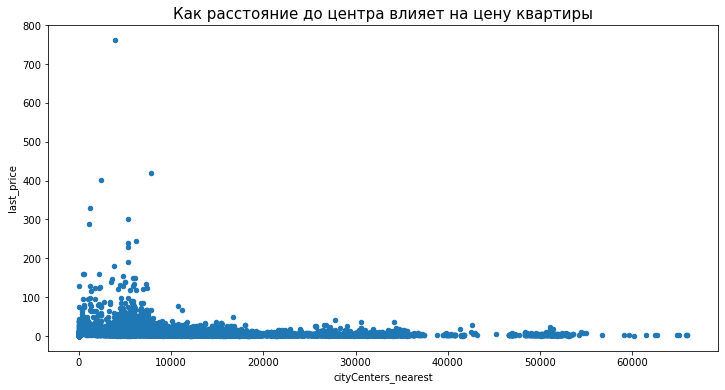

In [62]:
#Зависит ли цена квартиры от удаленности от центра
df.plot(y='last_price',x='cityCenters_nearest',kind='scatter', figsize=(12,6))
plt.title('Как расстояние до центра влияет на цену квартиры', fontsize=15)

In [63]:
#Посмотрим корреляцию между ценой и расстоянием до центра
df['cityCenters_nearest'].corr(df['price_per_meter'])

0.03136878381344915

<div class="alert alert-block alert-info">
Чем дальше квартира от центра, тем она дешевле. Корреляция есть, но небольшая, так как большинство наших объявлений находится вдали от центра.
    </div>

In [64]:
#Попробуем посмотреть квартира какого этажа стоит дороже
selling_floors=pd.pivot_table(df, index='floor_is', values='last_price', aggfunc='mean')

In [65]:
selling_floors

,last_price
floor_is,
другой,6.186117
первый,4.310936
последний,6.880396


Text(0.5, 1.0, 'Квартира на каком этаже стоит дороже/дешевле')

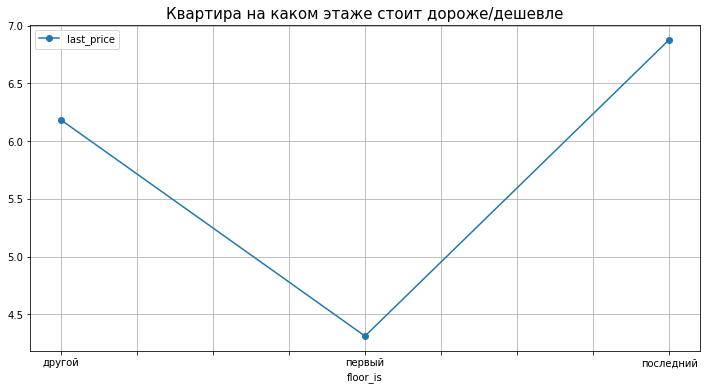

In [66]:
#Построим график методом plot
selling_floors.plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Квартира на каком этаже стоит дороже/дешевле', fontsize=15)

In [67]:
#Посмотрим корреляцию между floor и price_per_meter
df['floor'].corr(df['price_per_meter'])

0.12302469999941994

<div class="alert alert-block alert-info">
Квартиры расположенные последних этажах стоят дороже, чем квартиры расположенные на других этажах или на первом***
</div>

In [68]:
#Заивисит ли цена от дня публикации
selling_day=pd.pivot_table(df, index='published_day', values='last_price',)
selling_day.sort_values(by='last_price', ascending=False).reindex()

,last_price
published_day,
5,6.486054
3,6.216764
2,6.144942
0,6.022702
1,5.904136
4,5.877250
6,5.775750


Text(0.5, 1.0, 'Влияние дня недели на цену квартиры')

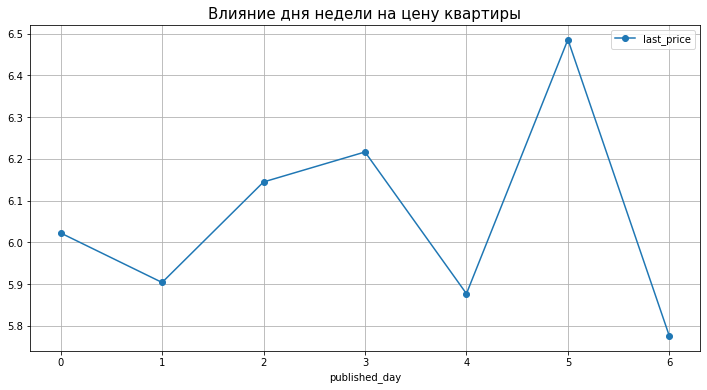

In [69]:
#Построим график 
selling_day.plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Влияние дня недели на цену квартиры', fontsize=15)

<div class="alert alert-block alert-info">
Из графика видно, что в воскресенье объявления выкладывают по более низкой цене</div>

In [70]:
#корреляция между днем публикации и ценой за кв. метр
df['published_day'].corr(df['price_per_meter'])

-0.007626448559052582

In [71]:
#Как зависит цена от месяца публикации объявления
selling_month=pd.pivot_table(df, index='published_month', values='last_price')
selling_month.sort_values(by='last_price', ascending=False)

,last_price
published_month,
12,6.520414
9,6.337708
4,6.256831
1,6.189333
7,6.163422
5,6.106750
2,5.983712
11,5.978490
3,5.870120


Text(0.5, 1.0, 'Зависимость от месяца размещения на цену квартиры')

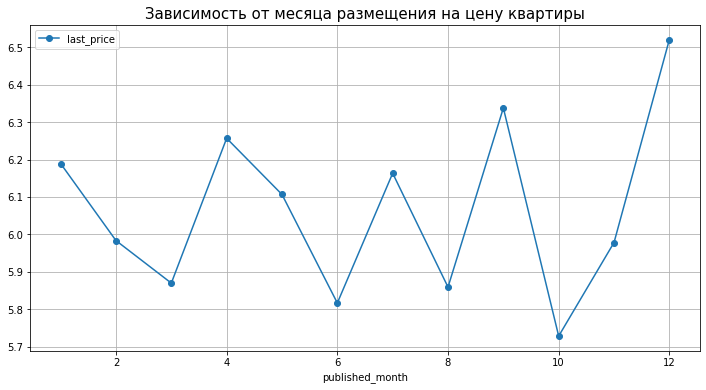

In [72]:
selling_month.plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Зависимость от месяца размещения на цену квартиры', fontsize=15)

<div class="alert alert-block alert-info">
    Судя по графику в октябре цены на объявления были ниже, чем в другие месяцы
</div>

In [73]:
#Посмотрим как менялась цена в разные года
selling_year=pd.pivot_table(df, index='published_year', values='price_per_meter')
selling_year.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
published_year,
2014,118589.159192
2019,97982.086429
2015,96058.856588
2016,88922.576852
2018,88179.101597
2017,88138.644157


Text(0.5, 1.0, 'Зависимость от года размещения на цену квартиры')

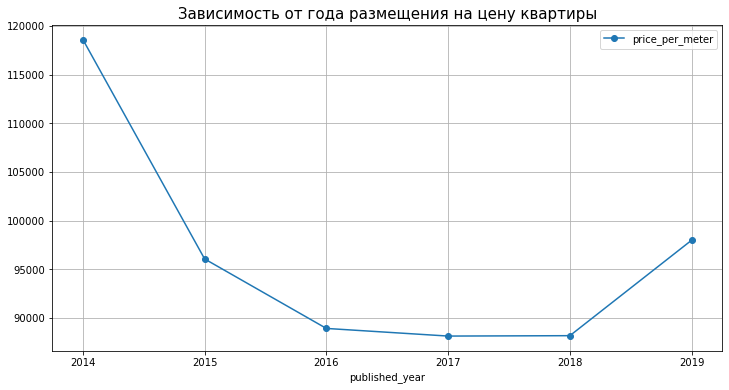

In [74]:
#Построим график со стилем o- для того чтобы отобразить линии с точками на графике
selling_year.plot(y='price_per_meter',style='o-', grid=True, figsize=(12,6))
plt.title('Зависимость от года размещения на цену квартиры', fontsize=15)

<div class="alert alert-block alert-info">
Цена за квадратный метр в период с 2016 по 2018 включительно составляла около 98 тыс рублей за квадратный метр.
<br>В 2019г. цена поднялась до 107 тыс рублей за квадратный метр
</div>

                last_price  ceiling_height     rooms  total_area     floor
last_price        1.000000        0.066468  0.363404    0.653813  0.026201
ceiling_height    0.066468        1.000000  0.053356    0.084107 -0.017792
rooms             0.363404        0.053356  1.000000    0.758347 -0.150862
total_area        0.653813        0.084107  0.758347    1.000000 -0.024955
floor             0.026201       -0.017792 -0.150862   -0.024955  1.000000


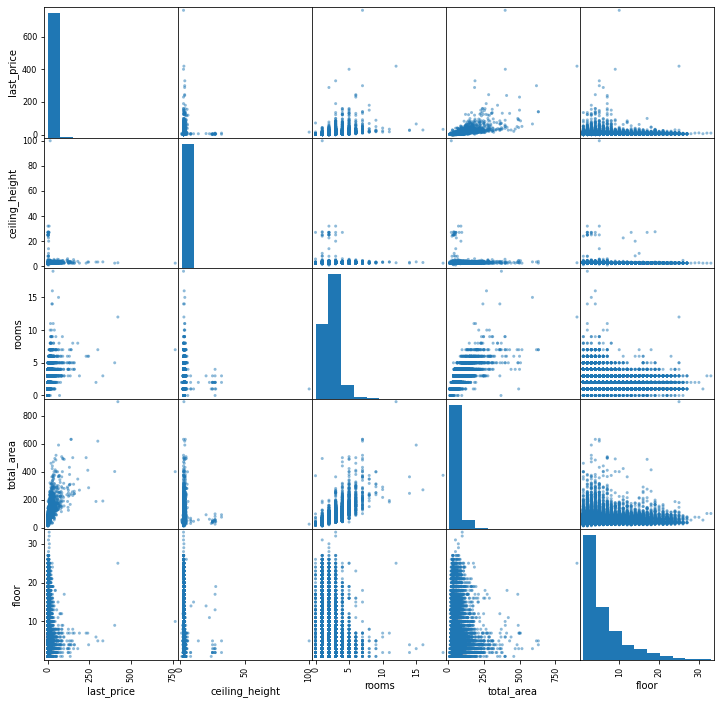

In [75]:
#Построим матрицу корреляций для столбцов влияющих на цену квартиры в общем
corr_table = df[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table, figsize=(12,12))
print(corr_table.corr())

### Общий вывод с итоговой картиной для всего города

<div class="alert alert-block alert-info">
<ul>
<li>Практически во всех зависимостях присутствует корреляция. Это значит, что площадь, количество комнат, высота потолков влияет на цену квартиры.</li>
<li>Квартиры на последних этажах стоят дороже, нежели квартиры расположенные на "других" этажах. Квартиры на первом этаже самые дешевые. </li>
<li>Цены на объявления в воскресенье выкладывались дешевле, чем в другие дни.</li>
<li>Цены в октябре на объявление были ниже, чем в остальные месяцы.</li>
<li>В 2014 году квартире стоило значительно дороже, нежели в следующие года. когда ценник упал до 98 тыс рублей за квадратный метр. </li></ul>
</div>

### 10 населенных пунктов с наибольшим количеством объявлений. Посчитаем среднюю цену квадратного метра в этих населенных пунктах. Выделим населенные пункты с самой высокой и низкой стоимостью жилья. 

In [76]:
#Выведем топ 10 с наибольшим количеством объявлений методом value_counts
df['locality_name'].value_counts()[1:11]

посёлок мурино       522
посёлок шушары       440
всеволожск           398
пушкин               369
колпино              338
посёлок парголово    327
гатчина              307
деревня кудрово      299
выборг               237
петергоф             201
Name: locality_name, dtype: int64

In [77]:
#Создадим лист, который будем использовать при дальнейшем срезе
village_list = [
    'посёлок мурино',
    'посёлок шушары',
    'всеволожск',
    'пушкин',
    'колпино',
    'посёлок парголово',
    'гатчина',
    'деревня кудрово',
    'выборг',
    'петергоф'
]

In [78]:
# С помощью среза оставим только нужные нам строки - содержащие в столбце locality_name нужные нам по листу населенные пункты
villagetop10 = df.query('locality_name in @village_list')

In [79]:
#Сохраним в переменную price_in_village среднюю цену за квадратный метр на населенный пункт
price_in_village = villagetop10.pivot_table(index='locality_name', values='price_per_meter')

In [80]:
#Выведем среднюю цену за квадратный метр, от наибольшего к меньшему
price_in_village =price_in_village.sort_values(by='price_per_meter', ascending=False)
price_in_village

,price_per_meter
locality_name,
пушкин,94460.993533
деревня кудрово,81042.135455
посёлок парголово,79531.831867
петергоф,74727.372284
посёлок мурино,73685.037728
посёлок шушары,69077.847287
колпино,65467.188423
всеволожск,58814.993014
гатчина,58069.772209


Text(0.5, 1.0, 'Цена за кв.м. в топ 10 населенных пунктах с наибольшим числом объявлений')

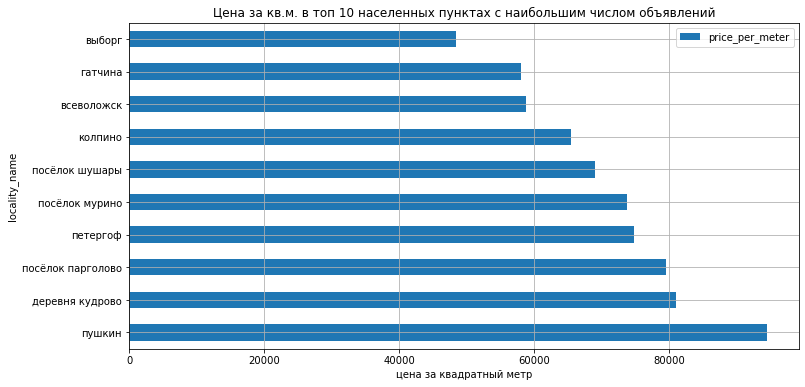

In [81]:
#Построим график 
price_in_village.plot(y='price_per_meter', grid=True, figsize=(12,6), kind='barh', stacked=True)
plt.xlabel('цена за квадратный метр')
plt.title('Цена за кв.м. в топ 10 населенных пунктах с наибольшим числом объявлений')

<div class="alert alert-block alert-info">
    <p>Самая высокая стоимость жилья расположена в <b>Пушкине - 103 611 рублей</b> за квадратный метр. Город Пушкин славится на весь мир расположенным на его территории заповедником Царское село. Это место входит в состав Всемирного наследия, оно славится интересной историей создания, красивейшими дворцами и парками. </p>
    <p>Самая низкая стоимость жилья расположена в <b>Выборге - 58 296 рублей</b> за квадратный метр, скорее всего потому что Выборг самый отдаленный населенный пункт - 121 км от Санкт-Петербурга. </p>
    </div>

### Выясним какая область Санкт-Петербурга входит в центр. Создадим столбец с расстоянием до центра в километрах (округлим до целых значений). Посчитаем среднюю цену для кажому километра. Построим график который покажет как цена зависит от удаленности от центра. Определим границу где график сильно меняется - это и будет центральная зона

In [82]:
#Создадим столбец distance_to_center(расстояние до центра) передадим столбец cityCenters_nearest и разделим на 1000,
#чтобы получить километры. После округлим до целого значения и переведем в формат int
df['distance_to_center'] = (df['cityCenters_nearest']/1000).round(0).astype(int)

In [83]:
df['price_for_kilometer'] = df['last_price']/df['distance_to_center']

In [84]:
#Сделаем срез по городу "санкт-петербург"
spb = df.query('locality_name == "санкт-петербург"')

In [85]:
#Проверим 
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,floor_is,ratio_area,ratio_kitchen,published_day,published_month,published_year,distance_to_center,price_for_kilometer
0,20,13,108,2019-03-07,3,2.70,16,51,8,0,...,-1,120370.370370,другой,0.472222,0.231481,3,3,2019,16,0.812500
2,10,5,56,2015-08-20,2,2.50,5,34,4,0,...,558,89285.714286,другой,0.607143,0.142857,3,8,2015,14,0.357143
3,0,64,159,2015-07-24,3,2.50,14,-1,9,0,...,424,402515.723270,другой,-0.006289,-0.006289,4,7,2015,7,9.142857
4,2,10,100,2018-06-19,2,3.03,14,32,13,0,...,121,100000.000000,другой,0.320000,0.410000,1,6,2018,8,1.250000
7,5,7,71,2019-04-18,2,2.50,24,-1,22,0,...,-1,98591.549296,другой,-0.014085,0.253521,3,4,2019,12,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3,35,2018-02-28,1,2.86,15,16,4,0,...,29,85714.285714,другой,0.457143,0.257143,2,2,2018,16,0.187500
23690,3,5,52,2018-07-19,2,2.50,5,31,2,0,...,15,96153.846154,другой,0.596154,0.115385,3,7,2018,6,0.833333
23691,11,9,72,2016-10-13,2,2.75,25,40,7,0,...,519,125000.000000,другой,0.555556,0.138889,3,10,2016,4,2.250000
23694,9,9,133,2017-03-21,3,3.70,5,73,3,0,...,-1,67669.172932,другой,0.548872,0.097744,1,3,2017,4,2.250000


In [86]:
#методом pivot_table посчитаем среднее
spb_df=spb.pivot_table(index='distance_to_center', values='price_for_kilometer', aggfunc='mean')
spb_df

,price_for_kilometer
distance_to_center,
0,inf
1,20.791667
2,8.675806
3,3.553333
4,3.200945
5,2.809783
6,2.478155
7,2.041497
8,1.184255


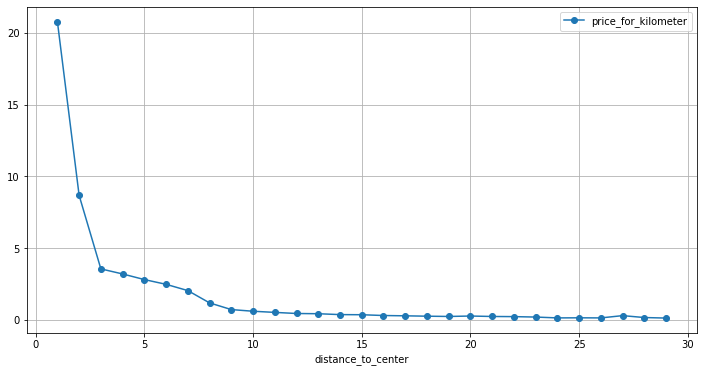

In [87]:
#Построим график, чтобы определить где центр и как меняется цена от расстояния квартиры до центра
spb_df.plot(y='price_for_kilometer', grid=True, figsize=(12,6), style='o-')

<div class="alert alert-block alert-info">
    По графику видно, что резко обрывается на 5 километрах. Следовательно центром будет радиус 5 км. 
    Также видно, как меняется цена взависимости от расстояния от центра, чем дальше от центра, тем дешевле квартира
</div>

## Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [88]:
#Проведем срез квартиры находящиеся в 5 километрах от центра
center_apartments = df.query('distance_to_center <= 5')

In [89]:
center_apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,floor_is,ratio_area,ratio_kitchen,published_day,published_month,published_year,distance_to_center,price_for_kilometer
5,10,2,30,2018-09-10,1,2.50,12,14,5,0,...,55,66666.666667,другой,0.466667,0.300000,0,9,2018,0,inf
8,20,2,33,2018-05-23,1,2.50,27,15,26,0,...,189,60606.060606,другой,0.454545,0.242424,2,5,2018,0,inf
12,10,3,54,2016-06-30,2,2.50,5,30,5,0,...,90,55555.555556,последний,0.555556,0.166667,3,6,2016,0,inf
22,20,5,58,2017-04-24,2,2.75,25,30,15,0,...,60,86206.896552,другой,0.517241,0.189655,0,4,2017,0,inf
24,8,6,97,2015-10-31,2,2.50,3,46,1,0,...,265,61855.670103,первый,0.474227,0.195876,5,10,2015,2,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1,30,2017-07-07,1,2.50,5,17,4,0,...,413,33333.333333,другой,0.566667,0.200000,4,7,2017,0,inf
23694,9,9,133,2017-03-21,3,3.70,5,73,3,0,...,-1,67669.172932,другой,0.548872,0.097744,1,3,2017,4,2.25
23695,14,3,59,2018-01-15,3,2.50,5,38,4,0,...,45,50847.457627,другой,0.644068,0.135593,0,1,2018,0,inf
23696,18,2,56,2018-02-11,2,2.50,3,29,1,0,...,-1,35714.285714,первый,0.517857,-0.017857,6,2,2018,0,inf


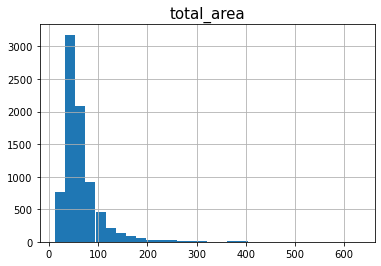

Среднее значение: 64.28521565694341


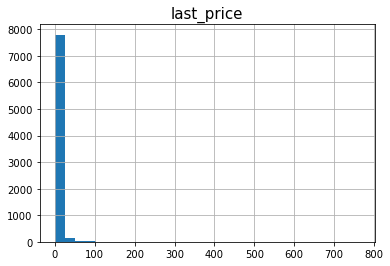

Среднее значение: 6.287334829219646


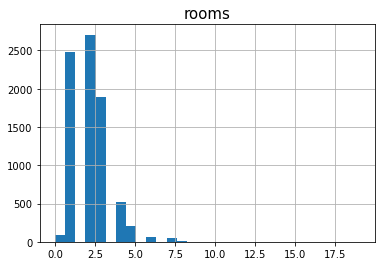

Среднее значение: 2.194465220643231


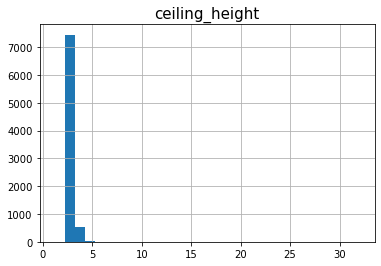

Среднее значение: 2.7175691847419596


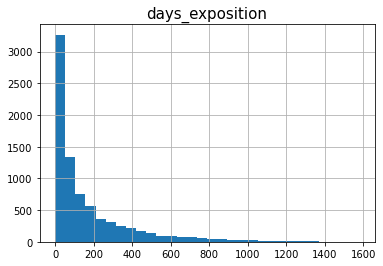

Среднее значение: 169.9675891298928


In [90]:
#С помощью цикла выведем гистограммы столбцов находящиеся в центре города. 
for column in center_apartments[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    range_max = center_apartments[column].max()
    range_min = center_apartments[column].min()
    center_apartments[column].hist(bins=30, range=(range_min,range_max))
    plt.title(column, fontsize=15)
    plt.show()
    print('Среднее значение:',center_apartments[column].mean())
    

In [91]:
#Получим информацию о столбце "время продажи" методом describe
center_apartments['days_exposition'].describe()

count    8022.000000
mean      169.967589
std       230.098599
min        -1.000000
25%        23.000000
50%        78.000000
75%       222.000000
max      1580.000000
Name: days_exposition, dtype: float64

### Выделим факторы, которые влияют на стоимость квартиры(число комнат, этаж, удаленность от центра, дата размещения объявления)

                last_price  ceiling_height     rooms  total_area     floor
last_price        1.000000        0.066468  0.363404    0.653813  0.026201
ceiling_height    0.066468        1.000000  0.053356    0.084107 -0.017792
rooms             0.363404        0.053356  1.000000    0.758347 -0.150862
total_area        0.653813        0.084107  0.758347    1.000000 -0.024955
floor             0.026201       -0.017792 -0.150862   -0.024955  1.000000


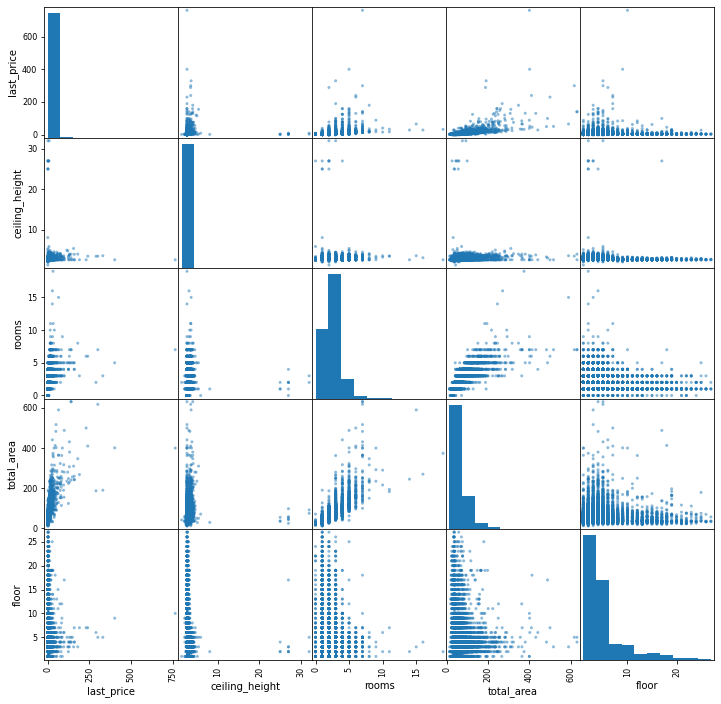

In [92]:
#Рассчитаем матрицу корреляция в столбах которые влияют на стоимость квартиры
corr_table_center = center_apartments[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table_center, figsize=(12,12))
print(corr_table.corr())

In [93]:
#Сравним корреляции между квартирами в центре и квартирами в общей таблице
center_apartments[['last_price','total_area','rooms','ceiling_height','days_exposition',
                  'published_day','published_month','published_year']].corr().sort_values('last_price', ascending=False)

,last_price,total_area,rooms,ceiling_height,days_exposition,published_day,published_month,published_year
last_price,1.000000,0.629040,0.348833,0.076147,0.059504,0.005739,-0.006356,-0.055105
total_area,0.629040,1.000000,0.780728,0.120047,0.105961,-0.012123,-0.015324,-0.092426
rooms,0.348833,0.780728,1.000000,0.089180,0.105613,-0.009838,-0.024156,-0.080434
ceiling_height,0.076147,0.120047,0.089180,1.000000,0.020665,-0.011071,0.001317,0.002590
days_exposition,0.059504,0.105961,0.105613,0.020665,1.000000,-0.017222,-0.002351,-0.630707
published_day,0.005739,-0.012123,-0.009838,-0.011071,-0.017222,1.000000,0.028468,0.001076
published_month,-0.006356,-0.015324,-0.024156,0.001317,-0.002351,0.028468,1.000000,-0.246904
published_year,-0.055105,-0.092426,-0.080434,0.002590,-0.630707,0.001076,-0.246904,1.000000


In [94]:
df[['last_price','total_area','rooms','ceiling_height','days_exposition',
                  'published_day','published_month','published_year']].corr().sort_values('last_price', ascending=False)

,last_price,total_area,rooms,ceiling_height,days_exposition,published_day,published_month,published_year
last_price,1.000000,0.653813,0.363404,0.066468,0.052901,0.001663,0.002496,-0.042621
total_area,0.653813,1.000000,0.758347,0.084107,0.096975,-0.004639,0.004925,-0.080544
rooms,0.363404,0.758347,1.000000,0.053356,0.079083,-0.004134,-0.004469,-0.055418
ceiling_height,0.066468,0.084107,0.053356,1.000000,0.009989,-0.013381,-0.004655,0.012218
days_exposition,0.052901,0.096975,0.079083,0.009989,1.000000,-0.014994,0.012369,-0.614485
published_month,0.002496,0.004925,-0.004469,-0.004655,0.012369,0.011496,1.000000,-0.269642
published_day,0.001663,-0.004639,-0.004134,-0.013381,-0.014994,1.000000,0.011496,-0.004799
published_year,-0.042621,-0.080544,-0.055418,0.012218,-0.614485,-0.004799,-0.269642,1.000000


### Вывод:

<div class="alert alert-block alert-info">

    <b>Квариры в центре (среднее) :</b>
    <ul>
        <li>площадь: 64 кв. метра</li>
        <li>цена : 6.2 млн рублей</li>
        <li>комнаты : 2</li>
        <li>высота потолков 2.7</li>
        <li>средняя продажа: 169 дней</li>
        <li>быстрая продажа: 23 дня</li>
    </ul>
    <b>Квартиры по всей таблице(среднее)</b>
    <ul>
        <li>площадь: 60 кв. метров</li>
        <li>цена: 6 млн рублей </li>
        <li>комнаты: 2 комнаты</li>
        <li>высота потолков: 2.6 метров</li>
        <li>средняя продажа: 156 дней.</li>
        <li>быстрая продажа: 22 дней</li>        
     </ul>
</div>

### Шаг 5. Общий вывод

<div class="alert alert-block alert-info">
<ul type=square>
<li>Проанализировав наш датасет из 23699 строк, можно увидеть, что имеются незаполненные значения. Большая часть незаполненных полей была в столбцах parks_nearest и ponds nearest. В основном пустые значения были в строках с объявлениями квартир в селах. Где, возможно, не стали указывать расстояние до центральных парков и прудов. Также были пустые значения в столбце balcony, я думаю, что в графе количество балконов, владельцы квартир у которых нет балконов просто игнорировали данное поле и ничего не заполняли. Поэтому данное поле я заполнил методом fillna на 0. Остальные пустые значения я заполнил "-1" чтобы в дальнейшем было легче провести срез. Были так же незаполненные значения в столбце is_apartment, Я их заполнил на False. Также  нашей таблицы были неверно выставлены типы данных, поэтому пришлось вручную сначала менять с to_numeric, чтобы получить float и уже после переводить в int. Столбец first_day_exposition перевел через to_datetime в правильный формат. <b>Last_price(цены)</b> я привел к миллионам. разделив все значения в столбце на 1 000 000.<br><br>
<li>По ТЗ добавили необходимые столбцы такие как price_per_meter(цена за квадратный метр), ratio_area(соотношение жилой площади к общей площади), ratio_kitchen(соотношение кухни на общую площадь) и добавил столбцы с днем, месяцем и годом публикации. Используя функции я заменил цифры месяцев и дней недель на их соответствующие названия<br><br>
<li>Изучив параметры с помощью гистограмм, я выяснил, что средняя стоимость квартиры составляет 5 млн рублей. Средняя площадь квартир составляет 60 квадратных метров, с 3мя комнатами и высотой потолков в 2.5 метра. В среднем объявление были опубликовано на сайте 180 дней. Самое долгое объявление простояло на сайте 1580 дней. И самое короткое всего 1 день. <br><br>
<li>Изучив графики взаимосвязей я пришел к выводу, что корелляцию присутствует у взаимосвязей между ценой и площадью квартиры. Составляет она 0.65. А это значит, что, чем болльше площадь квартиры, тем дороже стоит сама квартира. Также заметная корелляцию у взаимосвязей между ценой и удаленностью от центра квартиры, от количества комнат и этажа на каком расположена квартира. Квартиры расположенные на последних этажах значительно дороже, чем другие квартиры или квартиры расположенные на 1 этаже.<br><br> 
<li>Я вывел топ 10 населенных пунктов с наибольшим количеством объявлений. Вывел населенные пункты с самой высокой и низкой стоимостью жилья. Таким образом у меня получилось, что самая дорогая недвижимость стоит в Пушкине, что составляет 103 611 рублей. А самая дешевая в Выборге 58 296 рублей. Причина в том, что Пушкин является туристическим городом, имеет на своей территории знаменитые заповедники, славится своей интересной историей. А Выборг самое отдаленный населенный пункт, - 121 км от Санкт-Петербурга<br><br>
<li>Определил из графика что центром Питера является территория радиусом 5 км от нулевого километра. Сделав срез квартир с этим радиусом, проделал небольшой анализ и выяснил, что в центре в среднем по 2 комнаты, средняя цена 6.7 миллионов рублей, потолки высотов 2.7 метров и площадью 64 кв метра
</ul>
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод